# Exemplo básico de NeuralNet com TF

Irá separar ddos simples de forma linear. Será algo super simples, só pra pegar a forma de fazer memso

Passos:
1. Constuir o grafo
2. Inicializar a sessâo
3. Por os dado e pegar sua saida

In [1]:
# Importando
import numpy as np
import tensorflow as tf
# Definido 'sees 'ppara ter memsa saida
np.random.seed(101)
tf.set_random_seed(101)

In [13]:
# importar imagem do grafo como sera
#![](C:\Users\Rafael\Google Drive\Private Studies\Computer Advanced\udemy-jose-padilla-tensorflow\imgs\img15.png)

'[]' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


**Definindo dados X, Y : Entrada e A saida**

In [5]:
np.random.seed(101) # declara deno, pois ele sai para cada celula 
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

### Placeholders

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

### Operations
Podemos fazer de dois jeito:
+ 1. Como sé soma e multiplicação, pdoemos fazer por (a+b) e (a*b0
+ 2. Mas o correto seria fazer da forma do tensoFlow, cque é a forma que está como comentada. O adicional é que tem oparametro de name

In [7]:
add_op  = a+b  # tf.add(a,b)
mult_op = a*b  # tf.multiply(a,b)

### Running Sessions  to create Graphs with Feed Dictionaries
Vamos executad

In [14]:
# eh necessario criar a sessao apra executar
with tf.Session() as sess:
    # vou executar a operçâo 'add_op' sobre o placeholder a que será
    # o dado rand_a e sobre b: rand_b
    # isso serve se rand_a e ranb fossem so inteiros
    add_result = sess.run(add_op, feed_dict = {a: rand_a, b: rand_b})
    print(add_result, '\n')
    # O mesmo com a multiplicaçâo
    mult_result = sess.run(mult_op, feed_dict = {a: rand_a, b: rand_b})
    print(mult_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]] 

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


# Neural Net PART 2 - Mais real emesmo
MAIOR DIFERENÇA: TUDO É SOBRE VETORES, VOCE NAO ESPECIFICA 10 NODES, ESPECIFICA UM NODE COM VETOR DE 10

Configuran a NeuralNet

In [15]:
# 1. Definido caracteristicas da nossa rede
n_features = 10      # 10 features
n_dense_neurons = 3  # 3 neuronios (1 CAMADA SOEMENTE)

palce holder

In [16]:
# Placeholder for x : o none e porque nao é uma matriz, sera entao o número de featurs
# Perceba que é um unico place holder
x = tf.placeholder(tf.float32,(None,n_features))

In [17]:
 #Pesos W: 
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

# BIAS
b = tf.Variable(tf.zeros([n_dense_neurons]))

** Operation Activation Function **

In [18]:
# Funççoes auxiliares (serao processo necessarios para o que queremos fazer)
xW = tf.matmul(x,W)
z  = tf.add(xW,b)
# Funçâo de ativaçâo
a  = tf.sigmoid(z) # tf.nn.relu() or tf.tanh()

In [19]:
# Esse exemplo nao tme reajuste, vamos fazelo

init = tf.global_variables_initializer() # inicializar varaiaveis
# iniciar sessao e processar neuralNet
with tf.Session() as sess:
    sess.run(init) # realizar a inicializaçao
    # O que está aconcendo aqui (RECURSAO)
    # 1. Executa sigmoide
    #  2. Executa soma de ois parametros (xw e b), temos b (Variavel inicializada) mas nao temos xW
    #   3. xw é a multiplicação de matrizes x pela varaiveil inicializada W
    #      x é o place_holder, que definimos em 'feed_dict' que é np.random.random([1,n_features]
    #   4. Com isso volta a recrussao
    layer_out = sess.run(a, feed_dict = {x : np.random.random([1,n_features])})
# saida de tudo, é printada
print(layer_out)

[[ 0.08226703  0.662723    0.17261438]]


### Neural Net com DataDos Falso =  Regressao
+ agora, vamos fazer com funçâo de custo de verdade

In [21]:
# dados de entrada
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
print(x_data)
# dados de saida
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
print(y_label)
# obiamente, nao serao os mesmso, mas sera enter [-1.5,1.5 perto]

[ 0.5420333   1.17575569  0.85241231  2.50514314  4.67005971  4.41685654
  6.66701681  6.69180648  7.54731409  9.03483077]
[ -0.17289561   2.24387308   3.57001461   3.26783558   4.32780247
   5.96742265   6.14049066   6.63051206   7.54219188  10.41297596]


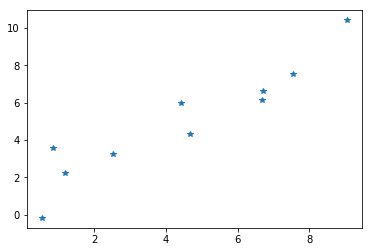

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# printando o grafico
plt.plot(x_data,y_label,'*')

obviamente os dados sao paraceido, pois vem do mesmo lienar_space com algum ruido pelo dandom entre [[-1,5, 1.5]

In [23]:
# esse valores podem ser aleartorios, mas fixamos como esses
# sao memso numeros alaertorios
m = tf.Variable(0.44)
b = tf.Variable(0.87)

#### funçâo de custo
Será o erro elevado ao quadrado

In [24]:
error = 0
for x,y in zip(x_data,y_label):
    predict_y = (m*x) + b    # Our predicted value
    error = error + (y - predict_y) ** 2 
    # The cost we want to minimize 
    # (we'll need to use an optimization function for the minimization!)

### Optimizer

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variabels adn Create Session and Run!

In [26]:
# inicializer variabels
init = tf.global_variables_initializer()
# criar sessao e geraras as operaçoes
with tf.Session() as sess:
    sess.run(init) # executa a inicializaçao
    epochs = 100 # contar epocas
    for i in range(epochs):
        sess.run(train)
    # Fetch Back Results
    final_slope , final_intercept = sess.run([m,b])

### Evaluate Results

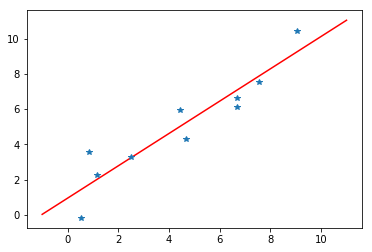

In [27]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')

plt.plot(x_data,y_label,'*')